In [1]:
%matplotlib inline
import scipy.io
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib import cm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# import ocean carbon states data
data = scipy.io.loadmat('matlab/OCS_data.mat')

# observation variables
obs_pco2 = data['OBS_PCO2_SW']
obs_sst = data['OBS_SST']
obs_nitr = data['OBS_NITR']
obs_flux = data['OBS_FLUX']
obs_sal = data['OBS_SAL']
obs_wspd = data['OBS_WSPD']

# model variables
mod_pco2 = data['MOD_PCO2_SW']
mod_sst = data['MOD_SST']
mod_nitr = data['MOD_NITR']
mod_flux = data['MOD_FLUX']
mod_sal = data['MOD_SAL']
mod_wspd = data['MOD_WSPD']

In [3]:
obs_pco2.shape

(45, 72, 12)

#### About the dimension of 45 x 72 x 12 variables:
* World map dimension is in 180 x 360, but divided into 4 x 5 grid, we obtain image size of 45 x 72.
* 12 channels indicating monthly average.

# North Atlantic

In [4]:
# observation variables
obs_pco2 = obs_pco2[23:45,20:43,:]
obs_sst = obs_sst[23:45,20:43,:]
obs_nitr = obs_nitr[23:45,20:43,:]
obs_flux = obs_flux[23:45,20:43,:]
obs_sal = obs_sal[23:45,20:43,:]
obs_wspd = obs_wspd[23:45,20:43,:]

# model variables
mod_pco2 = mod_pco2[23:45,20:43,:]
mod_sst = mod_sst[23:45,20:43,:]
mod_nitr = mod_nitr[23:45,20:43,:]
mod_flux = mod_flux[23:45,20:43,:]
mod_sal = mod_sal[23:45,20:43,:]
mod_wspd = mod_wspd[23:45,20:43,:]

In [5]:
obs_pco2.shape

(22, 23, 12)

## Univariate Distribution Histograms

In [6]:
# pdd plot for each variable
obs_pco2_reshaped = obs_pco2.reshape(22*23*12,)
mod_pco2_reshaped = mod_pco2.reshape(22*23*12,)
obs_sst_reshaped = obs_sst.reshape(22*23*12,)
mod_sst_reshaped = mod_sst.reshape(22*23*12,)
obs_nitr_reshaped = obs_nitr.reshape(22*23*12,)
mod_nitr_reshaped = mod_nitr.reshape(22*23*12,)
obs_flux_reshaped = obs_flux.reshape(22*23*12,)
mod_flux_reshaped = mod_flux.reshape(22*23*12,)
obs_sal_reshaped = obs_sal.reshape(22*23*12,)
mod_sal_reshaped = mod_sal.reshape(22*23*12,)
obs_wspd_reshaped = obs_wspd.reshape(22*23*12,)
mod_wspd_reshaped = mod_wspd.reshape(22*23*12,)

In [7]:
obs_pco2_reshaped.shape

(6072,)

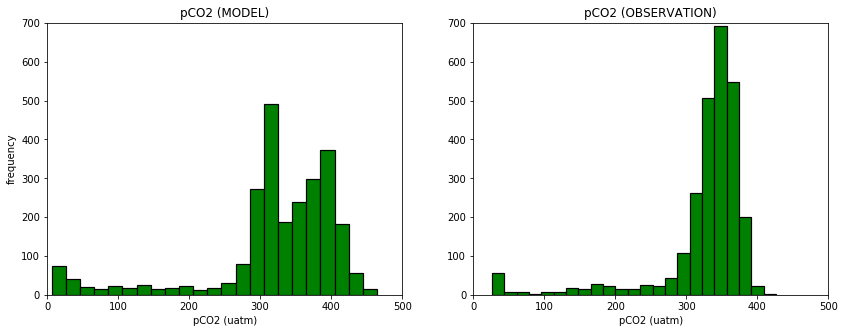

In [8]:
plt.figure(num=None, figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(mod_pco2_reshaped[~np.isnan(mod_pco2_reshaped)], bins=23, color='green', edgecolor='black', linewidth=1.2)
plt.title('pCO2 (MODEL)')
plt.xlabel('pCO2 (uatm)')
plt.ylabel('frequency')
plt.xlim((0,500))
plt.ylim((0,700))

plt.subplot(1, 2, 2)
plt.hist(obs_pco2_reshaped[~np.isnan(obs_pco2_reshaped)], bins=23, color='green', edgecolor='black', linewidth=1.2)
plt.title('pCO2 (OBSERVATION)')
plt.xlabel('pCO2 (uatm)')
plt.xlim((0,500))
plt.ylim((0,700))
plt.show()

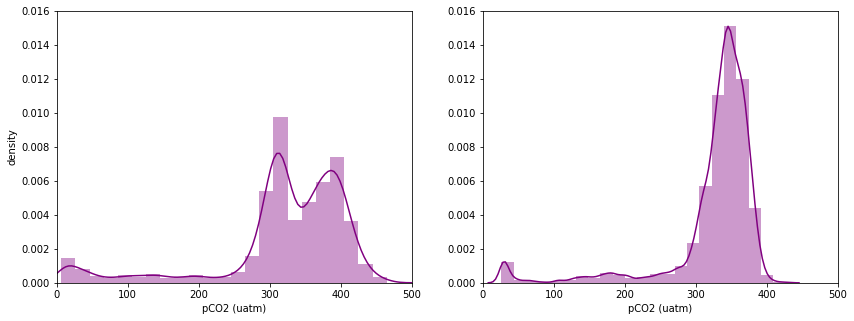

In [9]:
# probability density distribution plot
fig = plt.figure(num=None, figsize=(14, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(mod_pco2_reshaped[~np.isnan(mod_pco2_reshaped)], bins=23, color='purple',ax=ax1)
# ax1.set_title('pCO2 (MODEL)')
ax1.set_xlim(0,500)
ax1.set_ylim(0,0.016)
ax1.set_xlabel('pCO2 (uatm)')
ax1.set_ylabel('density')

sns.distplot(obs_pco2_reshaped[~np.isnan(obs_pco2_reshaped)], bins=23, color='purple',ax=ax2)
# ax2.set_title('pCO2 (OBSERVATION)')
ax2.set_xlim(0,500)
ax2.set_ylim(0,0.016)
ax2.set_xlabel('pCO2 (uatm)')
plt.show()

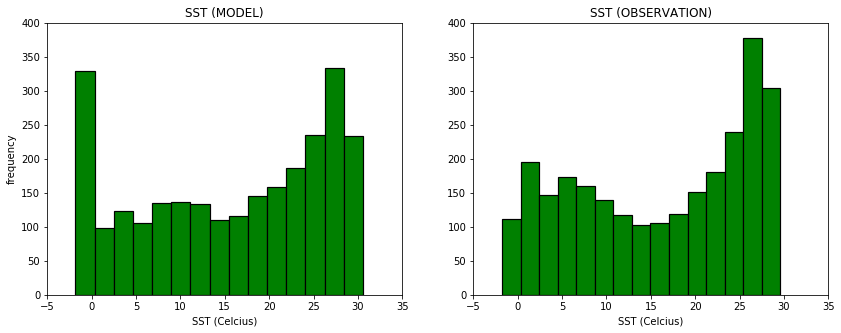

In [10]:
plt.figure(num=None, figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(mod_sst_reshaped[~np.isnan(mod_sst_reshaped)], bins=15, color='green', edgecolor='black', linewidth=1.2)
plt.title('SST (MODEL)')
plt.xlabel('SST (Celcius)')
plt.ylabel('frequency')
plt.xlim((-5,35))
plt.ylim((0,400))

plt.subplot(1, 2, 2)
plt.hist(obs_sst_reshaped[~np.isnan(obs_sst_reshaped)], bins=15, color='green', edgecolor='black', linewidth=1.2)
plt.title('SST (OBSERVATION)')
plt.xlabel('SST (Celcius)')
plt.xlim((-5,35))
plt.ylim((0,400))
plt.show()

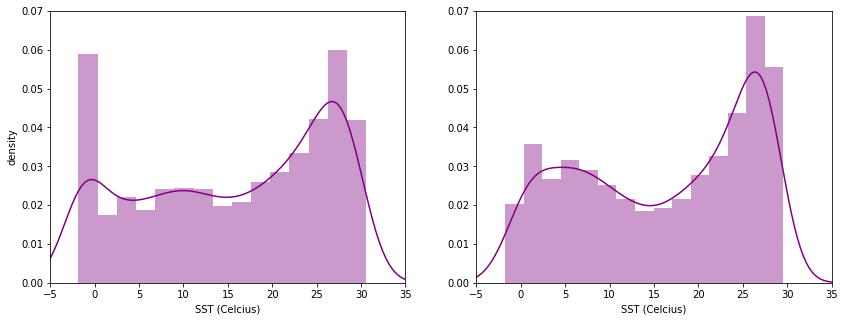

In [11]:
# probability density distribution plot
fig = plt.figure(num=None, figsize=(14, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(mod_sst_reshaped[~np.isnan(mod_sst_reshaped)], bins=15, color='purple',ax=ax1)
ax1.set_xlim(-5,35)
ax1.set_ylim(0,0.07)
ax1.set_xlabel('SST (Celcius)')
ax1.set_ylabel('density')

sns.distplot(obs_sst_reshaped[~np.isnan(obs_sst_reshaped)], bins=15, color='purple',ax=ax2)
ax2.set_xlim(-5,35)
ax2.set_ylim(0,0.07)
ax2.set_xlabel('SST (Celcius)')
plt.show()

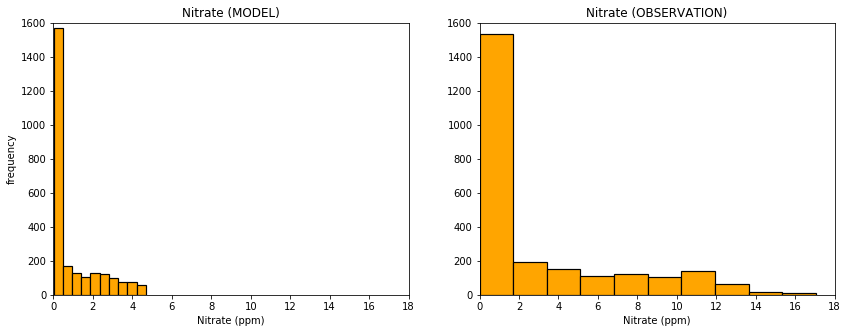

In [12]:
plt.figure(num=None, figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(mod_nitr_reshaped[~np.isnan(mod_nitr_reshaped)], color='orange', edgecolor='black', linewidth=1.2)
plt.title('Nitrate (MODEL)')
plt.ylabel('frequency')
plt.xlabel('Nitrate (ppm)')
plt.ylim((0,1600))
plt.xlim((0,18))

plt.subplot(1, 2, 2)
plt.hist(obs_nitr_reshaped[~np.isnan(obs_nitr_reshaped)], color='orange', edgecolor='black', linewidth=1.2)
plt.title('Nitrate (OBSERVATION)')
plt.xlabel('Nitrate (ppm)')
plt.ylim((0,1600))
plt.xlim((0,18))
plt.show()

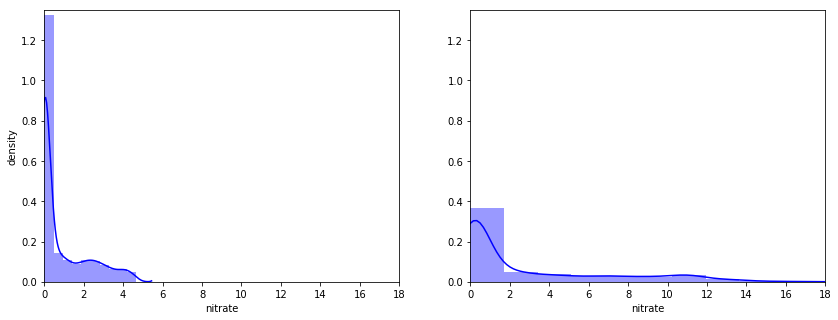

In [13]:
# probability density distribution plot
fig = plt.figure(num=None, figsize=(14, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(mod_nitr_reshaped[~np.isnan(mod_nitr_reshaped)], bins=10, color='blue',ax=ax1)
ax1.set_xlim(0,18)
ax1.set_ylim(0,1.35)
ax1.set_xlabel('nitrate')
ax1.set_ylabel('density')

sns.distplot(obs_nitr_reshaped[~np.isnan(obs_nitr_reshaped)], bins=10, color='blue',ax=ax2)
ax2.set_xlim(0,18)
ax2.set_ylim(0,1.35)
ax2.set_xlabel('nitrate')
plt.show()

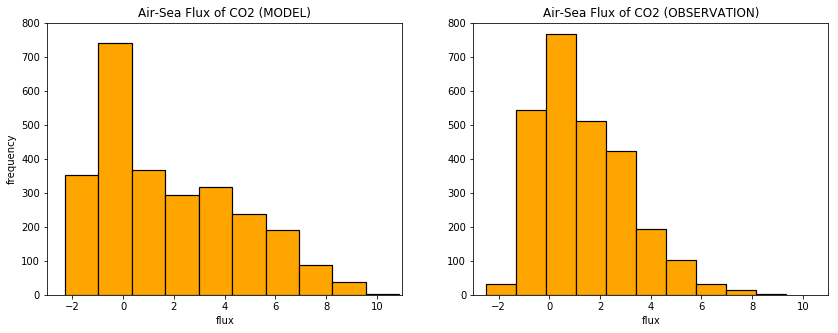

In [14]:
plt.figure(num=None, figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(mod_flux_reshaped[~np.isnan(mod_flux_reshaped)], color='orange', edgecolor='black', linewidth=1.2)
plt.title('Air-Sea Flux of CO2 (MODEL)')
plt.xlabel('flux')
plt.ylabel('frequency')
plt.ylim((0,800))
plt.xlim((-3,11))

plt.subplot(1, 2, 2)
plt.hist(obs_flux_reshaped[~np.isnan(obs_flux_reshaped)], color='orange', edgecolor='black', linewidth=1.2)
plt.title('Air-Sea Flux of CO2 (OBSERVATION)')
plt.xlabel('flux')
plt.ylim((0,800))
plt.xlim((-3,11))
plt.show()

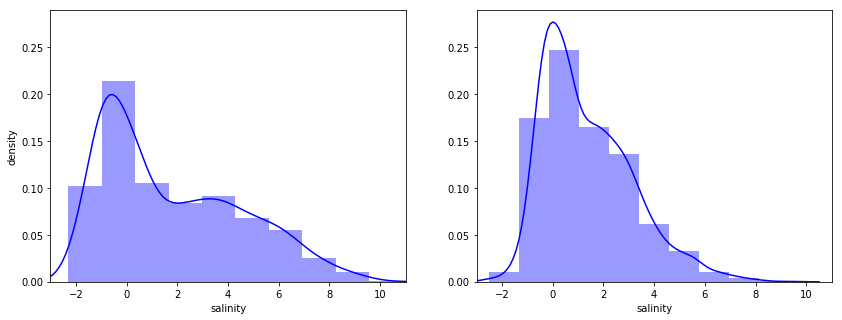

In [15]:
# probability density distribution plot
fig = plt.figure(num=None, figsize=(14, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(mod_flux_reshaped[~np.isnan(mod_flux_reshaped)], bins=10, color='blue',ax=ax1)
ax1.set_xlim(-3,11)
ax1.set_ylim(0,0.29)
ax1.set_xlabel('salinity')
ax1.set_ylabel('density')

sns.distplot(obs_flux_reshaped[~np.isnan(obs_flux_reshaped)], bins=10, color='blue',ax=ax2)
ax2.set_xlim(-3,11)
ax2.set_ylim(0,0.29)
ax2.set_xlabel('salinity')
plt.show()

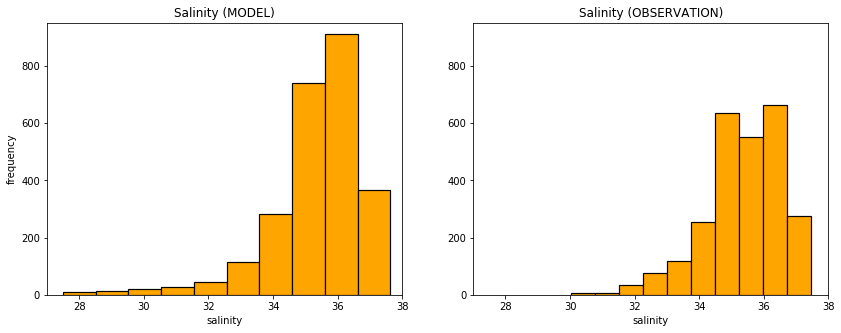

In [16]:
plt.figure(num=None, figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(mod_sal_reshaped[~np.isnan(mod_sal_reshaped)], color='orange', edgecolor='black', linewidth=1.2)
plt.title('Salinity (MODEL)')
plt.ylabel('frequency')
plt.xlabel('salinity')
plt.ylim((0,950))
plt.xlim((27,38))

plt.subplot(1, 2, 2)
plt.hist(obs_sal_reshaped[~np.isnan(obs_sal_reshaped)], color='orange', edgecolor='black', linewidth=1.2)
plt.title('Salinity (OBSERVATION)')
plt.xlabel('salinity')
plt.ylim((0,950))
plt.xlim((27,38))
plt.show()

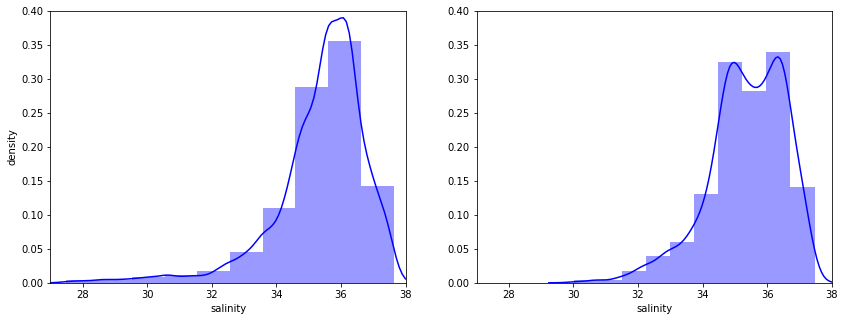

In [17]:
# probability density distribution plot
fig = plt.figure(num=None, figsize=(14, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(mod_sal_reshaped[~np.isnan(mod_sal_reshaped)], bins=10, color='blue',ax=ax1)
ax1.set_xlim(27,38)
ax1.set_ylim(0,0.4)
ax1.set_xlabel('salinity')
ax1.set_ylabel('density')

sns.distplot(obs_sal_reshaped[~np.isnan(obs_sal_reshaped)], bins=10, color='blue',ax=ax2)
ax2.set_xlim(27,38)
ax2.set_ylim(0,0.4)
ax2.set_xlabel('salinity')
plt.show()

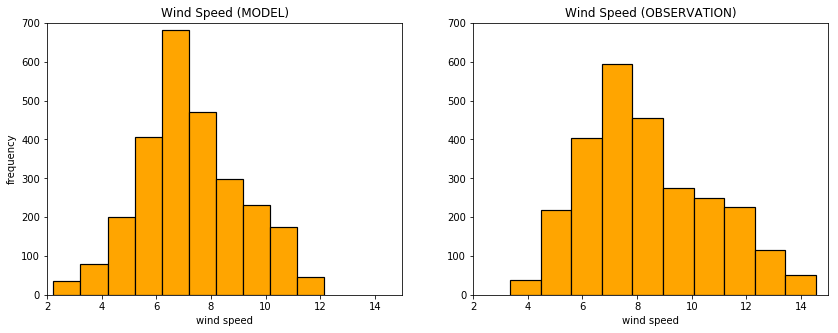

In [18]:
plt.figure(num=None, figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(mod_wspd_reshaped[~np.isnan(mod_wspd_reshaped)], color='orange', edgecolor='black', linewidth=1.2)
plt.title('Wind Speed (MODEL)')
plt.xlabel('wind speed')
plt.ylabel('frequency')
plt.ylim((0,700))
plt.xlim((2,15))

plt.subplot(1, 2, 2)
plt.hist(obs_wspd_reshaped[~np.isnan(obs_wspd_reshaped)], color='orange', edgecolor='black', linewidth=1.2)
plt.title('Wind Speed (OBSERVATION)')
plt.xlabel('wind speed')
plt.ylim((0,700))
plt.xlim((2,15))
plt.show()

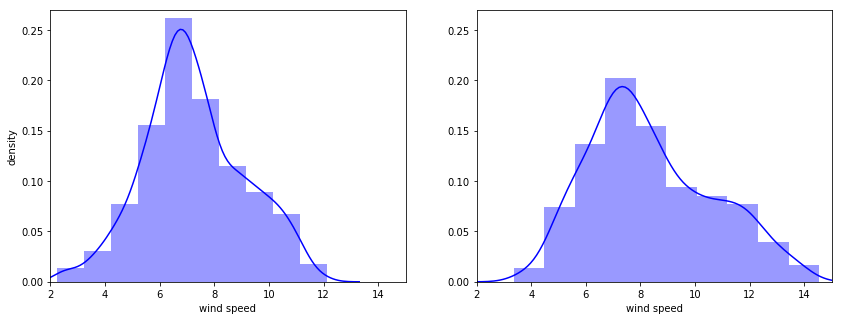

In [19]:
# probability density distribution plot
fig = plt.figure(num=None, figsize=(14, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(mod_wspd_reshaped[~np.isnan(mod_wspd_reshaped)], bins=10, color='blue',ax=ax1)
ax1.set_xlim(2,15)
ax1.set_ylim(0,0.27)
ax1.set_xlabel('wind speed')
ax1.set_ylabel('density')

sns.distplot(obs_wspd_reshaped[~np.isnan(obs_wspd_reshaped)], bins=10, color='blue',ax=ax2)
ax2.set_xlim(2,15)
ax2.set_ylim(0,0.27)
ax2.set_xlabel('wind speed')
plt.show()

## 2-D Histograms
* selecting data range and interval based on pdd above

In [20]:
#Make the 12 2D histograms

# observation
obs_pco2_reshaped = obs_pco2.reshape(22*23,12)
obs_sst_reshaped = obs_sst.reshape(22*23,12)
obs_nitr_reshaped = obs_nitr.reshape(22*23,12)
obs_flux_reshaped = obs_flux.reshape(22*23,12)
obs_sal_reshaped = obs_sal.reshape(22*23,12)
obs_wspd_reshaped = obs_wspd.reshape(22*23,12)

# model
mod_pco2_reshaped = mod_pco2.reshape(22*23,12)
mod_sst_reshaped = mod_sst.reshape(22*23,12)
mod_nitr_reshaped = mod_nitr.reshape(22*23,12)
mod_flux_reshaped = mod_flux.reshape(22*23,12)
mod_sal_reshaped = mod_sal.reshape(22*23,12)
mod_wspd_reshaped = mod_wspd.reshape(22*23,12)

In [21]:
# Constrain to North Atlantic region
arr1 = [50,200,300,350,400] #pCO2
arr2 = [-2,10,20,25,30]     #SST

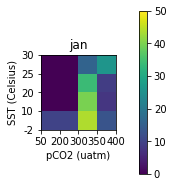

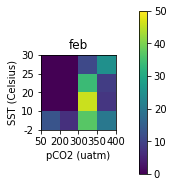

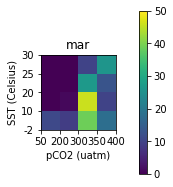

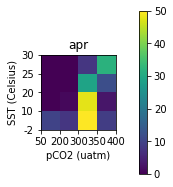

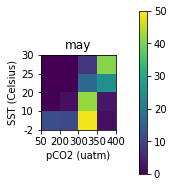

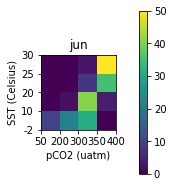

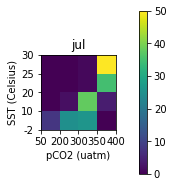

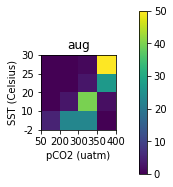

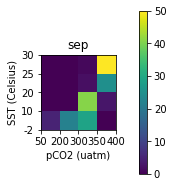

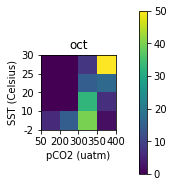

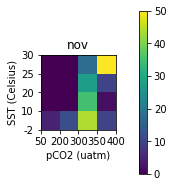

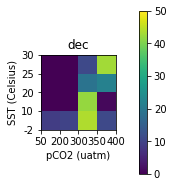

In [22]:
hist2d = np.array([])
mos = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

for i in range(0,12):
    
    # append monthly histograms
    X = obs_pco2_reshaped[:,i]
    Y = obs_sst_reshaped[:,i]
    X1 = np.nan_to_num(X)
    Y1 = np.nan_to_num(Y)
    H, xedges, yedges = np.histogram2d(Y1,X1,bins=(arr2, arr1))
    hist2d = np.append(hist2d,H[::-1])
    
    # plot from the list
    plt.close('all')
    fig = plt.figure(figsize=(7, 3))
    ax = fig.add_subplot(131)
    ax.set_title(mos[i])
    plt.imshow(H[::-1])
    cax = ax.imshow(H[::-1], interpolation='nearest')
    
    cbar = fig.colorbar(cax,orientation="vertical", pad=0.2)
    cax.set_clim(vmin=0, vmax=50)
    plt.xlabel('pCO2 (uatm)')
    plt.ylabel('SST (Celsius)')
    x = [-0.5,0.5,1.5,2.5,3.5]
    y = [3.5,2.5,1.5,0.5,-0.5]
    plt.xticks(x, arr1, rotation='horizontal')
    plt.yticks(y, arr2, rotation='horizontal')
    plt.show()


## K-Means Clustering

In [23]:
hist4Cluster = hist2d.reshape(12,4*4)
kmeans = KMeans(n_clusters=3,random_state=0).fit(hist4Cluster)
y_kmeans = kmeans.predict(hist4Cluster)

print('kmeans: ', y_kmeans)

kmeans:  [2 2 2 2 1 0 0 0 0 0 1 1]


Based on k-means classification result above:
* 0: Summer
* 1: Transition
* 2: Winter

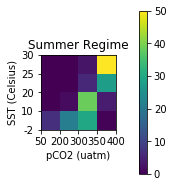

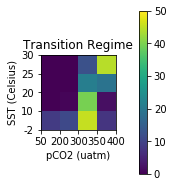

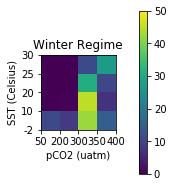

In [24]:
regimes = ['Summer', 'Transition', 'Winter']

for i in range(len(regimes)):
    plt.close('all')
    fig = plt.figure(figsize=(7, 3))
    ax = fig.add_subplot(131)
    ax.set_title(regimes[i] + ' Regime')
    center = kmeans.cluster_centers_[i,:].reshape(4, 4)
    plt.imshow(center)
    cax = ax.imshow(center, interpolation='nearest')
    cbar = fig.colorbar(cax, orientation='vertical', pad=0.2)
    cax.set_clim(vmin=0, vmax=50)
    plt.xlabel('pCO2 (uatm)')
    plt.ylabel('SST (Celsius)')
    x = [-0.5,0.5,1.5,2.5,3.5]
    y = [3.5,2.5,1.5,0.5,-0.5]
    plt.xticks(x, arr1, rotation='horizontal')
    plt.yticks(y, arr2, rotation='horizontal')
    plt.show()
    

## Agglomerative/Hierarchical Clustering

In [25]:
ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(hist4Cluster)
avg = AgglomerativeClustering(n_clusters=3, linkage='average').fit(hist4Cluster)
complete = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(hist4Cluster)

print('agglomerative clustering with ward linkage: ', ward.labels_)
print('agglomerative clustering with average linkage: ', avg.labels_)
print('agglomerative clustering with complete linkage: ', complete.labels_)

agglomerative clustering with ward linkage:  [2 2 2 2 1 0 0 0 0 0 1 1]
agglomerative clustering with average linkage:  [1 1 1 1 1 0 0 0 0 2 1 1]
agglomerative clustering with complete linkage:  [2 2 2 2 1 0 0 0 0 0 1 1]


Ward and Complete seem to have the same exact patterns, which aligns well with k-means result:
* 0: Summer
* 1: Transition
* 2: Winter

Average linkage has quite different pattern:
* 0: Summer
* 1: Winter
* 2: Transition

## Expextation-Maximization (EM) Clustering
* A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means:

In [26]:
from sklearn.mixture import GaussianMixture as gmm

em_full = gmm(n_components=3, covariance_type='full', random_state=0).fit(hist4Cluster)
em_tied = gmm(n_components=3, covariance_type='tied', random_state=0).fit(hist4Cluster)
em_diag = gmm(n_components=3, covariance_type='diag', random_state=0).fit(hist4Cluster)
em_sphr = gmm(n_components=3, covariance_type='spherical', random_state=0).fit(hist4Cluster)

print('EM with full covariance:', gmm.predict(em_full, hist4Cluster))
print('EM with tied covariance:', gmm.predict(em_tied, hist4Cluster))
print('EM with diagonal covariance:', gmm.predict(em_diag, hist4Cluster))
print('EM with spherical covariance:', gmm.predict(em_sphr, hist4Cluster))

EM with full covariance: [2 2 2 2 1 0 0 0 0 0 1 1]
EM with tied covariance: [2 2 2 2 1 0 0 0 0 0 1 1]
EM with diagonal covariance: [2 2 2 2 1 0 0 0 0 0 1 1]
EM with spherical covariance: [2 2 2 2 1 0 0 0 0 0 1 1]


## Shilouette Scores for selecting k in K-Means

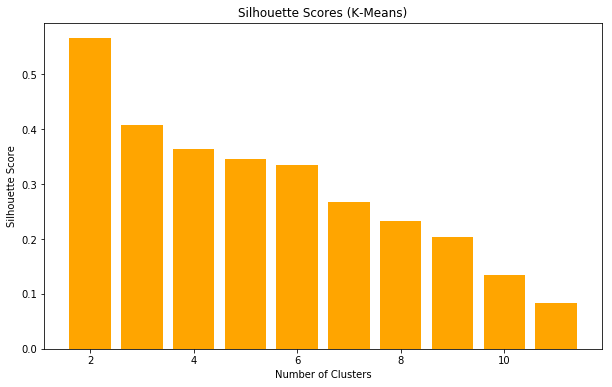

In [27]:
k_scores = list()
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=0)
    k_scores.append(silhouette_score(hist4Cluster, kmeans.fit_predict(hist4Cluster)))

plt.figure(figsize=(10, 6))
plt.bar(list(range(2, 12)), k_scores, color = 'orange')
plt.title('Silhouette Scores (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## BIC Criterion for selecting number of components in EM Gaussian Mixtures

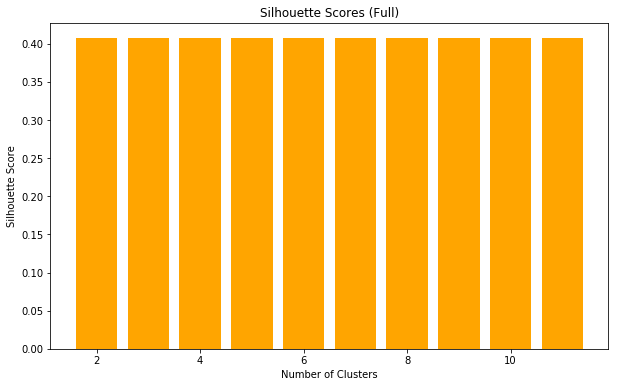

In [28]:
full_scores = list()
for k in range(2, 12):
    em_full = gmm(n_components=3, covariance_type='full', random_state=0).fit(hist4Cluster)
    full_scores.append(silhouette_score(hist4Cluster, gmm.predict(em_full, hist4Cluster)))

plt.figure(figsize=(10, 6))
plt.bar(list(range(2, 12)), full_scores, color = 'orange')
plt.title('Silhouette Scores (Full)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## 3-D Clustering with Scatterplot
* Adding Wind Speed (WSPD) variable

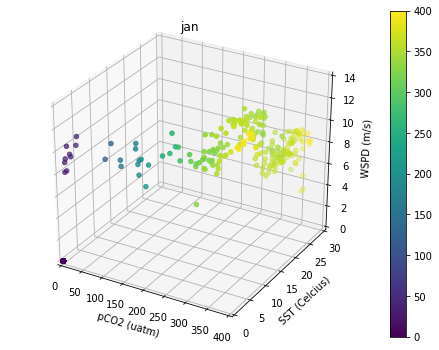

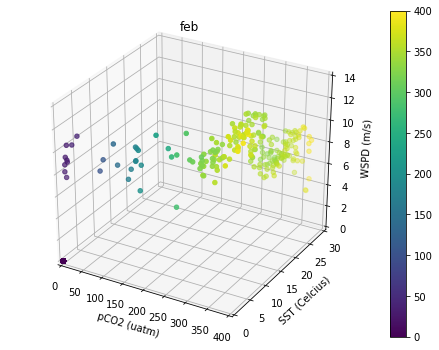

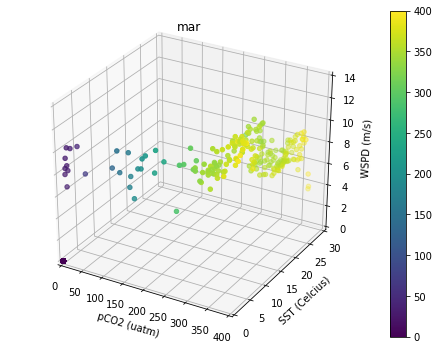

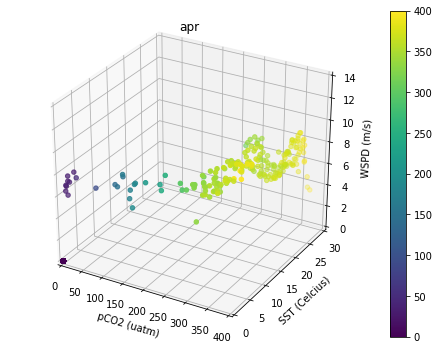

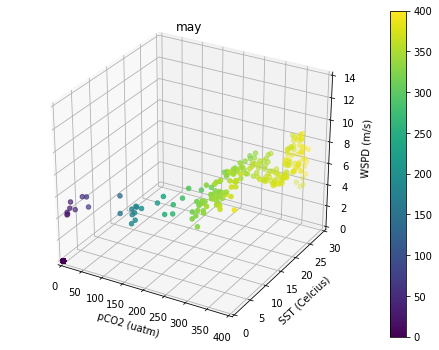

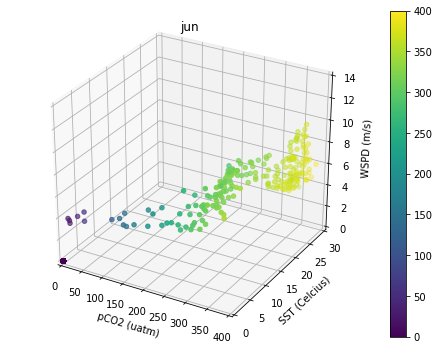

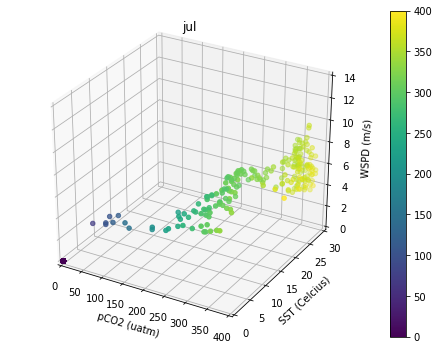

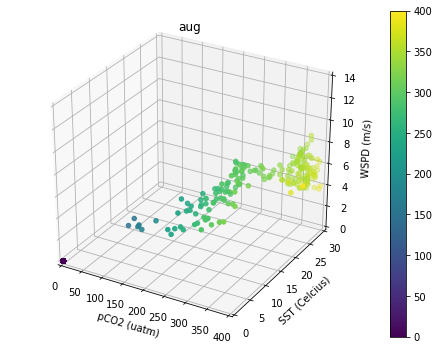

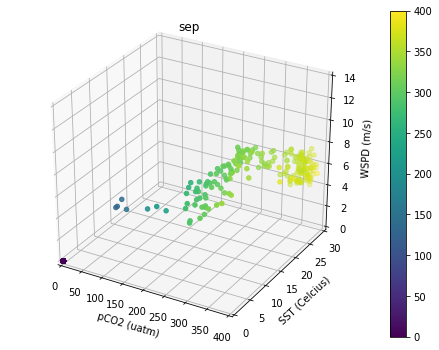

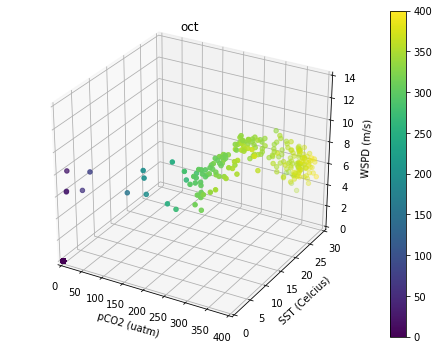

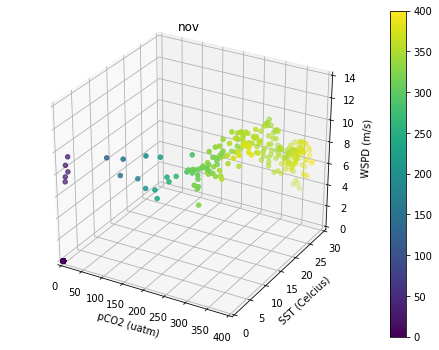

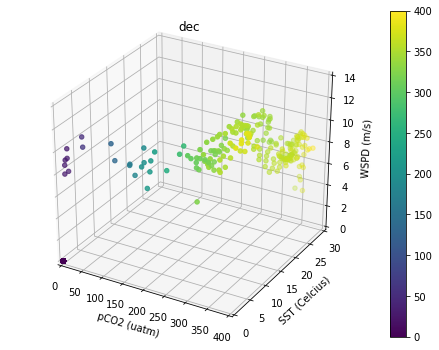

In [29]:
scatter3d = np.array([])
mos = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

for i in range(0,12):
    # getting important variables
    X = obs_pco2_reshaped[:,i]
    Y = obs_sst_reshaped[:,i]
    Z = obs_wspd_reshaped[:,i]
    xs = np.nan_to_num(X)
    ys = np.nan_to_num(Y)
    zs = np.nan_to_num(Z)

    # classification input: 22*23*3 (22*23 for resolution of 4*5 grids 
    # and 3 for x, y, z variables) -- for each channel
    r = np.column_stack((xs,ys,zs))
    
    # classifying based on scatterplot (each datapoint)
    scatter3d = np.append(scatter3d, r)
    
    # plot 3-D visualization
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111,projection='3d')
    colmap = cm.ScalarMappable(cmap='viridis')
    colmap.set_clim(vmin=0, vmax=400)
    colmap.set_array(xs)
    yg = ax.scatter(xs, ys, zs, c=xs, marker='o')
    cb = fig.colorbar(colmap)
    
    ax.set_title(mos[i])
    ax.set_xlabel('pCO2 (uatm)')
    ax.set_ylabel('SST (Celcius)')
    ax.set_zlabel('WSPD (m/s)')
    ax.set_xlim(0,400)
    ax.set_ylim(0,30)
    ax.set_zlim(0,14)

    plt.show()

## K-Means for 3-D Clustering (Scatterplot)

In [30]:
# there are total of 506 datapoints and 3 variables. So makes 506 variables in total for a month.
scatter3d_reshaped = scatter3d.reshape(12,506*3)
kmeans = KMeans(n_clusters=3,random_state=22222).fit(scatter3d_reshaped)
y_kmeans = kmeans.predict(scatter3d_reshaped)

print('kmeans: ', y_kmeans)

kmeans:  [0 0 0 0 0 1 2 2 2 1 1 0]


Does it make sense to have the longest winter time?

### 3-Seasons

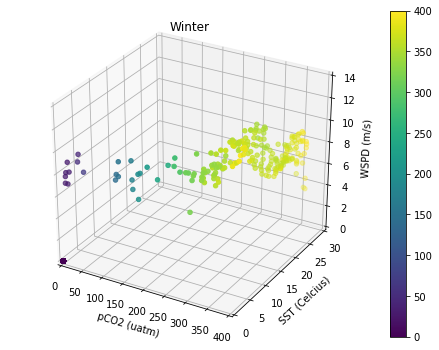

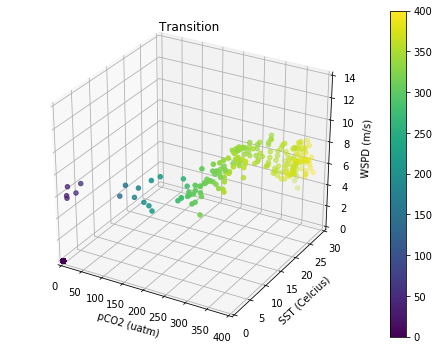

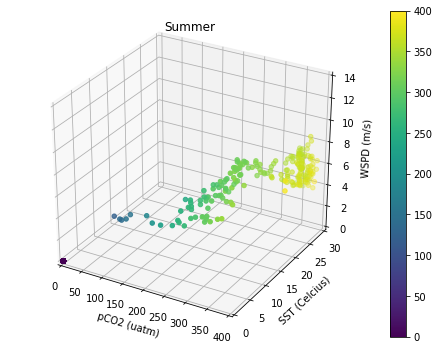

In [31]:
regimes = ['Winter', 'Transition', 'Summer']

for i in range(len(regimes)):
    
    xs = kmeans.cluster_centers_[i,:].reshape(506,3)[:,0]
    ys = kmeans.cluster_centers_[i,:].reshape(506,3)[:,1]
    zs = kmeans.cluster_centers_[i,:].reshape(506,3)[:,2]

    # plot 3-D visualization
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111,projection='3d')
    colmap = cm.ScalarMappable(cmap='viridis')
    colmap.set_clim(vmin=0, vmax=400)
    colmap.set_array(xs)
    yg = ax.scatter(xs, ys, zs, c=xs, marker='o')
    cb = fig.colorbar(colmap)
    
    ax.set_title(regimes[i])
    ax.set_xlabel('pCO2 (uatm)')
    ax.set_ylabel('SST (Celcius)')
    ax.set_zlabel('WSPD (m/s)')
    ax.set_xlim(0,400)
    ax.set_ylim(0,30)
    ax.set_zlim(0,14)

    plt.show()
    

### 4-Seasons

In [32]:
# there are total of 506 datapoints and 3 variables. So makes 506 variables in total for a month.
scatter3d_reshaped = scatter3d.reshape(12,506*3)
kmeans = KMeans(n_clusters=4,random_state=22222).fit(scatter3d_reshaped)
y_kmeans = kmeans.predict(scatter3d_reshaped)

print('kmeans: ', y_kmeans)

kmeans:  [0 0 0 0 3 3 2 2 2 1 1 0]


Does it make sense to have the longest winter time?

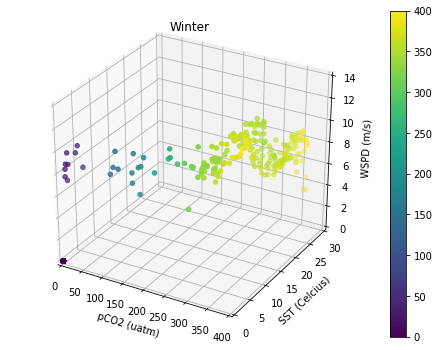

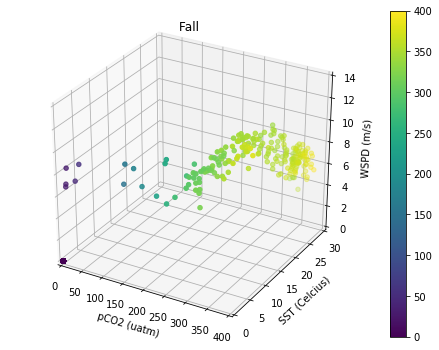

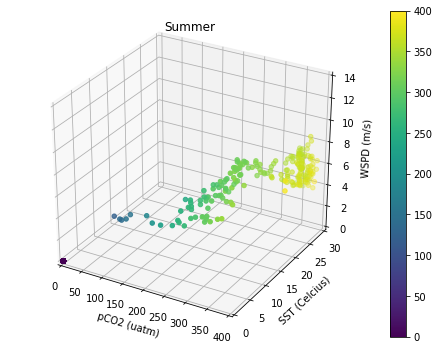

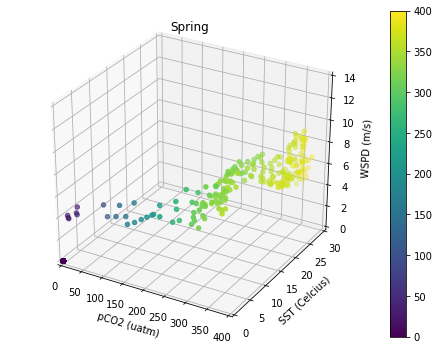

In [33]:
regimes = ['Winter', 'Fall', 'Summer', 'Spring']

for i in range(len(regimes)):
    
    xs = kmeans.cluster_centers_[i,:].reshape(506,3)[:,0]
    ys = kmeans.cluster_centers_[i,:].reshape(506,3)[:,1]
    zs = kmeans.cluster_centers_[i,:].reshape(506,3)[:,2]

    # plot 3-D visualization
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111,projection='3d')
    colmap = cm.ScalarMappable(cmap='viridis')
    colmap.set_clim(vmin=0, vmax=400)
    colmap.set_array(xs)
    yg = ax.scatter(xs, ys, zs, c=xs, marker='o')
    cb = fig.colorbar(colmap)
    
    ax.set_title(regimes[i])
    ax.set_xlabel('pCO2 (uatm)')
    ax.set_ylabel('SST (Celcius)')
    ax.set_zlabel('WSPD (m/s)')
    ax.set_xlim(0,400)
    ax.set_ylim(0,30)
    ax.set_zlim(0,14)

    plt.show()
    

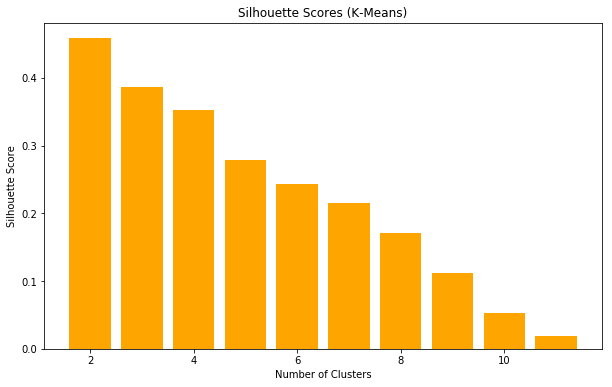

In [34]:
k_scores = list()
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=0)
    k_scores.append(silhouette_score(scatter3d_reshaped, kmeans.fit_predict(scatter3d_reshaped)))

plt.figure(figsize=(10, 6))
plt.bar(list(range(2, 12)), k_scores, color = 'orange')
plt.title('Silhouette Scores (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## 3-D Clustering with Histograms
* Adding Wind Speed (WSPD) variable

In [35]:
from mpl_toolkits.mplot3d import Axes3D

In [36]:
def plot2D(H,i):
    plt.close('all')
    fig = plt.figure(figsize=(7, 3))
    ax = fig.add_subplot(131)
    ax.set_title(mos[i])
    plt.imshow(H[::-1])
    cax = ax.imshow(H[::-1], interpolation='nearest')
    print(max(H[::-1].flatten()))
    
    cbar = fig.colorbar(cax,orientation="vertical", pad=0.2)
    cax.set_clim(vmin=0, vmax=50)
    plt.xlabel('pCO2 (uatm)')
    plt.ylabel('SST (Celsius)')
    x = [-0.5,0.5,1.5,2.5,3.5]
    y = [3.5,2.5,1.5,0.5,-0.5]
    arr1 = [50,200,300,350,400] # pCO2
    arr2 = [-2,10,20,25,30]     # SST
    plt.xticks(x, arr1, rotation='horizontal')
    plt.yticks(y, arr2, rotation='horizontal')
    plt.show()

3.0


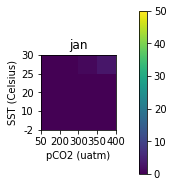

28.0


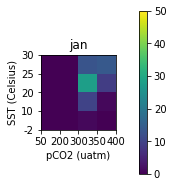

21.0


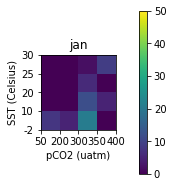

22.0


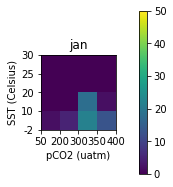

4.0


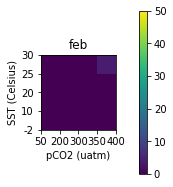

30.0


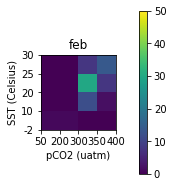

21.0


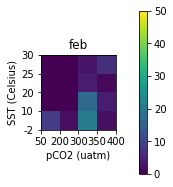

18.0


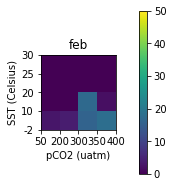

4.0


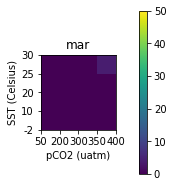

26.0


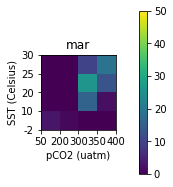

30.0


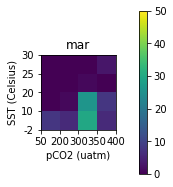

12.0


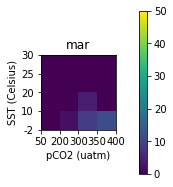

4.0


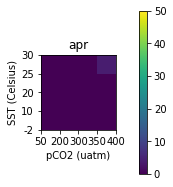

29.0


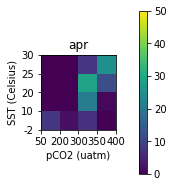

43.0


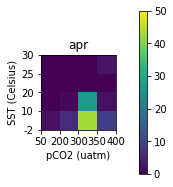

0.0


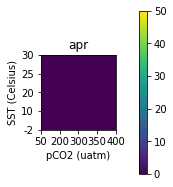

11.0


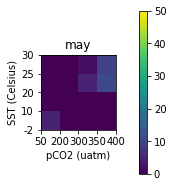

39.0


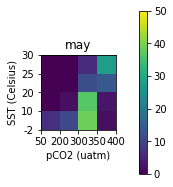

10.0


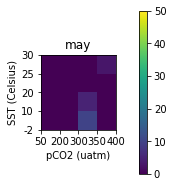

0.0


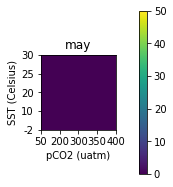

23.0


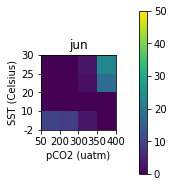

40.0


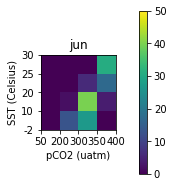

5.0


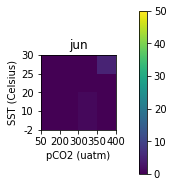

0.0


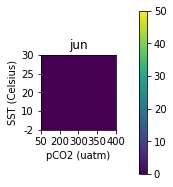

31.0


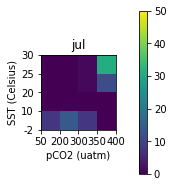

44.0


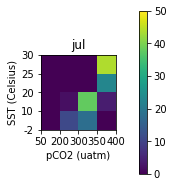

2.0


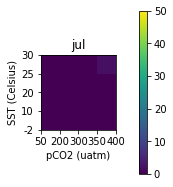

0.0


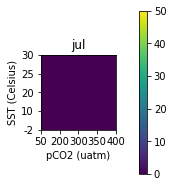

47.0


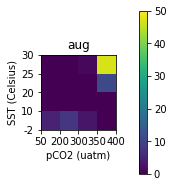

40.0


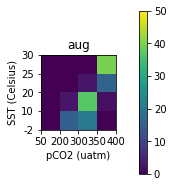

3.0


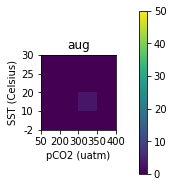

0.0


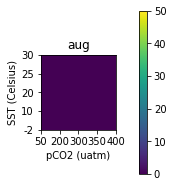

50.0


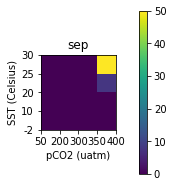

40.0


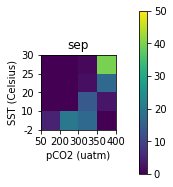

27.0


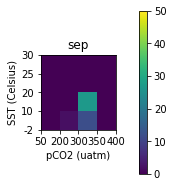

0.0


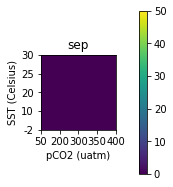

26.0


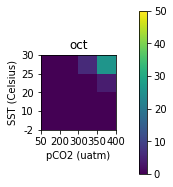

47.0


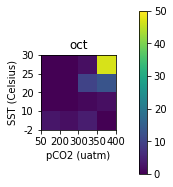

35.0


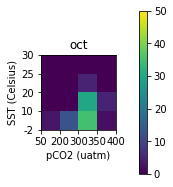

2.0


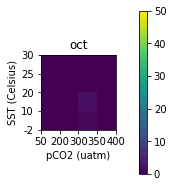

7.0


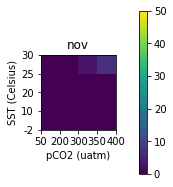

43.0


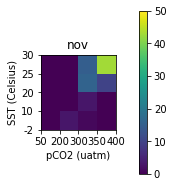

34.0


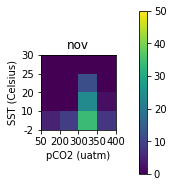

9.0


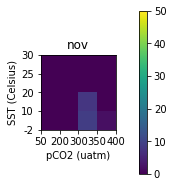

3.0


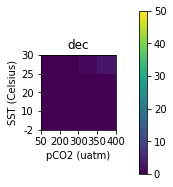

37.0


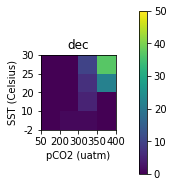

28.0


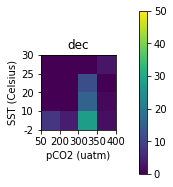

21.0


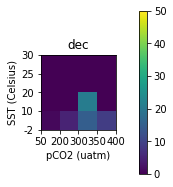

In [37]:
hist2d1 = np.array([])
hist2d2 = np.array([])
hist2d3 = np.array([])
hist2d4 = np.array([])

mos = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

for i in range(0,12):
    
    # append monthly histograms
    X = obs_pco2_reshaped[:,i]
    Y = obs_sst_reshaped[:,i]
    Z = obs_wspd_reshaped[:,i]
    X1 = np.nan_to_num(X)
    Y1 = np.nan_to_num(Y)
    Z1 = np.nan_to_num(Z)
    arr1 = [50,200,300,350,400] # pCO2
    arr2 = [-2,10,20,25,30]     # SST
    arr3 = [3,6,9,12,15]        # WSPD
    
    # setting bins on the windspeed variable
    bin1 = np.where(np.logical_and(Z1>0, Z1<6))
    bin2 = np.where(np.logical_and(Z1>=6, Z1<9))
    bin3 = np.where(np.logical_and(Z1>=9, Z1<12))
    bin4 = np.where(np.logical_and(Z1>=12, Z1<15))
    
    # each bin above returns 
    wspd_x1 = X1[bin1]
    wspd_y1 = Y1[bin1]
    wspd_x2 = X1[bin2]
    wspd_y2 = Y1[bin2]
    wspd_x3 = X1[bin3]
    wspd_y3 = Y1[bin3]
    wspd_x4 = X1[bin4]
    wspd_y4 = Y1[bin4]
    
    # create 2d histogram for each binned data
    H1, xedges1, yedges1 = np.histogram2d(wspd_y1, wspd_x1, bins=(arr2, arr1))
    hist2d1 = np.append(hist2d1,H1[::-1])
    
    H2, xedges2, yedges2 = np.histogram2d(wspd_y2, wspd_x2, bins=(arr2, arr1))
    hist2d2 = np.append(hist2d2,H2[::-1])
    
    H3, xedges3, yedges3 = np.histogram2d(wspd_y3, wspd_x3, bins=(arr2, arr1))
    hist2d3 = np.append(hist2d3,H3[::-1])
    
    H4, xedges4, yedges4 = np.histogram2d(wspd_y4, wspd_x4, bins=(arr2, arr1))
    hist2d4 = np.append(hist2d4,H4[::-1])
    
#     print("\n",mos[i])
#     print(max(hist2d1))
#     print(hist2d1)
#     print(max(hist2d2))
#     print(hist2d2)
#     print(max(hist2d3))
#     print(hist2d3)
#     print(max(hist2d4))
#     print(hist2d4)
    
    plot2D(H1,i)
    plot2D(H2,i)
    plot2D(H3,i)
    plot2D(H4,i)

In [38]:
hist4Cluster1 = hist2d1.reshape(12,4*4)
hist4Cluster2 = hist2d2.reshape(12,4*4)
hist4Cluster3 = hist2d3.reshape(12,4*4)
hist4Cluster4 = hist2d4.reshape(12,4*4)

kmeans1 = KMeans(n_clusters=3,random_state=0).fit(hist4Cluster1)
y_kmeans1 = kmeans1.predict(hist4Cluster1)

kmeans2 = KMeans(n_clusters=4,random_state=0).fit(hist4Cluster2)
y_kmeans2 = kmeans2.predict(hist4Cluster2)

kmeans3 = KMeans(n_clusters=3,random_state=0).fit(hist4Cluster3)
y_kmeans3 = kmeans3.predict(hist4Cluster3)

kmeans4 = KMeans(n_clusters=3,random_state=0).fit(hist4Cluster4)
y_kmeans4 = kmeans4.predict(hist4Cluster4)

print('kmeans bin #1: ', y_kmeans1)
print('kmeans bin #2: ', y_kmeans2)
print('kmeans bin #3: ', y_kmeans3)
print('kmeans bin #4: ', y_kmeans4)


kmeans bin #1:  [1 1 1 1 1 2 2 0 0 2 1 1]
kmeans bin #2:  [1 1 1 1 0 0 3 3 3 2 2 2]
kmeans bin #3:  [2 2 1 1 0 0 0 0 2 1 1 2]
kmeans bin #4:  [1 1 2 0 0 0 0 0 0 0 2 1]


Based on k-means classification result above:
* 0: Summer
* 1: Transition
* 2: Winter

In [111]:
kmeans1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [113]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

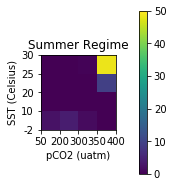

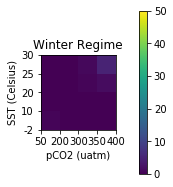

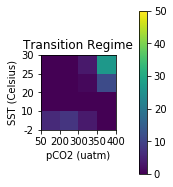

In [110]:
plot_regimes(kmeans1,['Summer', 'Winter', 'Transition'])

In [39]:
def plot_regimes(kmeans,regimes):
    for i in range(len(regimes)):
        plt.close('all')
        fig = plt.figure(figsize=(7, 3))
        ax = fig.add_subplot(131)
        ax.set_title(regimes[i] + ' Regime')
        center = kmeans.cluster_centers_[i,:].reshape(4, 4)
        plt.imshow(center)
        cax = ax.imshow(center, interpolation='nearest')
        cbar = fig.colorbar(cax, orientation='vertical', pad=0.2)
        cax.set_clim(vmin=0, vmax=50)
        plt.xlabel('pCO2 (uatm)')
        plt.ylabel('SST (Celsius)')
        x = [-0.5,0.5,1.5,2.5,3.5]
        y = [3.5,2.5,1.5,0.5,-0.5]
        plt.xticks(x, arr1, rotation='horizontal')
        plt.yticks(y, arr2, rotation='horizontal')
        plt.show()

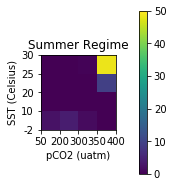

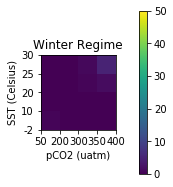

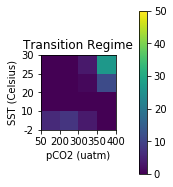

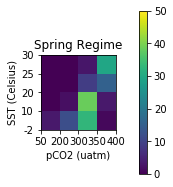

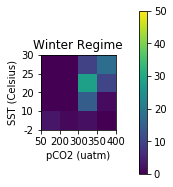

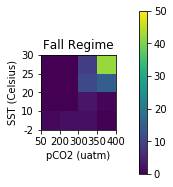

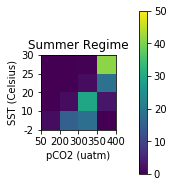

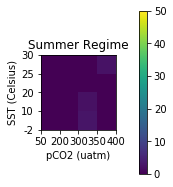

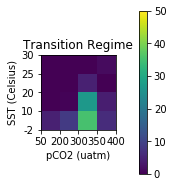

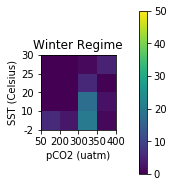

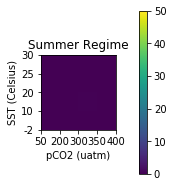

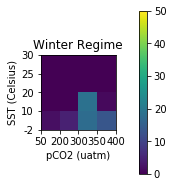

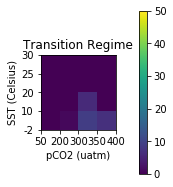

In [40]:
plot_regimes(kmeans1,['Summer', 'Winter', 'Transition'])
plot_regimes(kmeans2,['Spring', 'Winter', 'Fall', 'Summer'])
plot_regimes(kmeans3,['Summer', 'Transition', 'Winter'])
plot_regimes(kmeans4,['Summer', 'Winter', 'Transition'])

In [41]:
def silhouette(kmeans,hist4Cluster):    
    k_scores = list()
    for k in range(2, 12):
        kmeans = KMeans(n_clusters=k, random_state=0)
        k_scores.append(silhouette_score(scatter3d_reshaped, kmeans.fit_predict(scatter3d_reshaped)))

    plt.figure(figsize=(10, 6))
    plt.bar(list(range(2, 12)), k_scores, color = 'orange')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

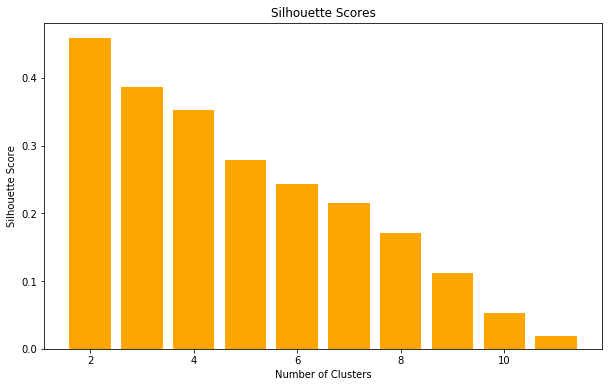

In [42]:
silhouette(kmeans1,hist4Cluster1)

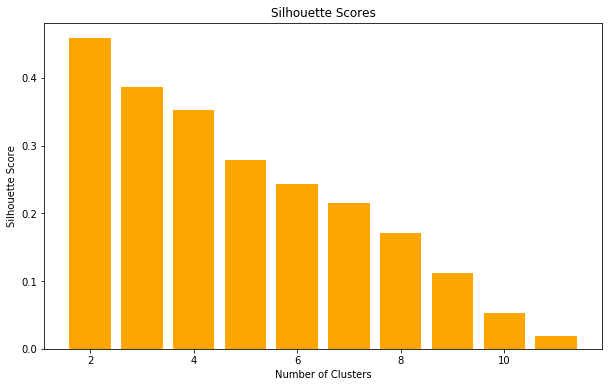

In [43]:
silhouette(kmeans2,hist4Cluster2)

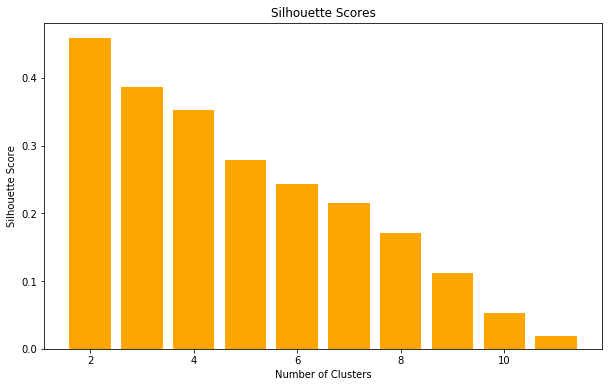

In [44]:
silhouette(kmeans3,hist4Cluster3)

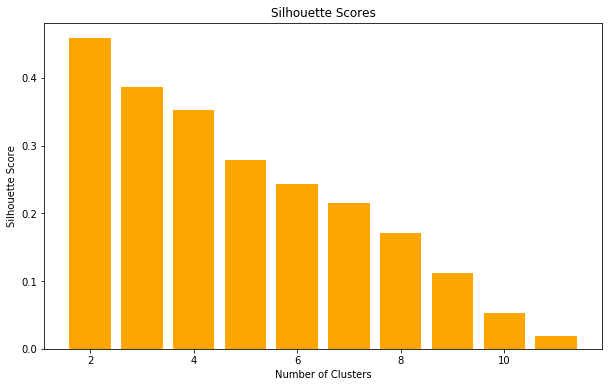

In [45]:
silhouette(kmeans4,hist4Cluster4)

## Classifying by (4x4x4) x 12

In [230]:
array3d = np.array([])

mos = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

for i in range(0,12):
    
    # append monthly histograms
    X = obs_pco2_reshaped[:,i]
    Y = obs_sst_reshaped[:,i]
    Z = obs_wspd_reshaped[:,i]
    X1 = np.nan_to_num(X)
    Y1 = np.nan_to_num(Y)
    Z1 = np.nan_to_num(Z)

    arr1 = [50,200,300,350,400] # pCO2
    arr2 = [-2,10,20,25,30]     # SST
    arr3 = [3,6,9,12,15]        # WSPD
    
    # histogram input: 22x23 x 3 for each channel
    r = np.column_stack((Z1,Y1,X1))
    H, edges = np.histogramdd(r, bins = (arr3, arr2,arr1))
    array3d = np.append(array3d,H[::-1])

In [231]:
hist3d = array3d.reshape(12,4*4*4)
kmeans = KMeans(n_clusters=3,random_state=0).fit(hist3d)
y_kmeans = kmeans.predict(hist3d)

print('kmeans: ', y_kmeans)

kmeans:  [2 2 2 2 0 0 0 0 0 1 1 1]


Based on k-means classification result above:
* 0: Summer
* 1: Transition
* 2: Winter

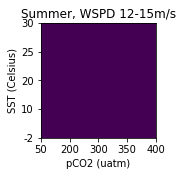

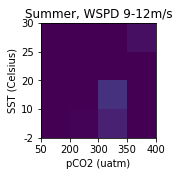

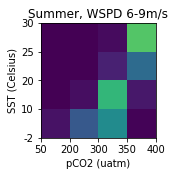

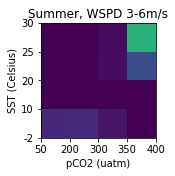

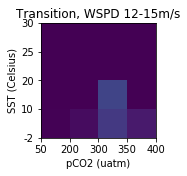

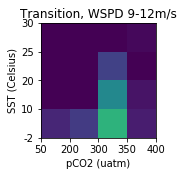

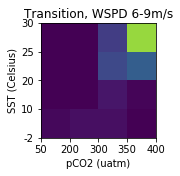

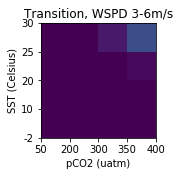

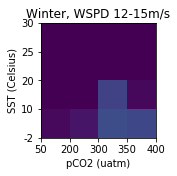

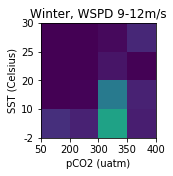

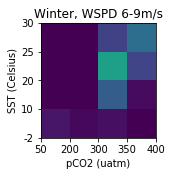

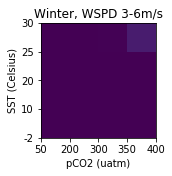

In [264]:
regimes = ['Summer', 'Transition', 'Winter']
wspd_bins = ['12-15m/s','9-12m/s','6-9m/s','3-6m/s']

for i in range(len(regimes)):
    center = kmeans.cluster_centers_[i,:].reshape(4,4,4)
    
    for j in range(len(wspd_bins)): # bin number of wind speed
        plt.close('all')
        fig = plt.figure(figsize=(7, 3))
        ax = fig.add_subplot(131)
        ax.set_title(regimes[i] + ', WSPD ' + wspd_bins[j])
        plt.imshow(center[j][::-1])
        cax = ax.imshow(center[j][::-1], interpolation='nearest')
#         cbar = fig.colorbar(cax, orientation='vertical', pad=0.2)
        cax.set_clim(vmin=0, vmax=50)
        plt.xlabel('pCO2 (uatm)')
        plt.ylabel('SST (Celsius)')
        x = [-0.5,0.5,1.5,2.5,3.5]
        y = [3.5,2.5,1.5,0.5,-0.5]
        plt.xticks(x, arr1, rotation='horizontal')
        plt.yticks(y, arr2, rotation='horizontal')
        plt.show()

## Binning with scatter points


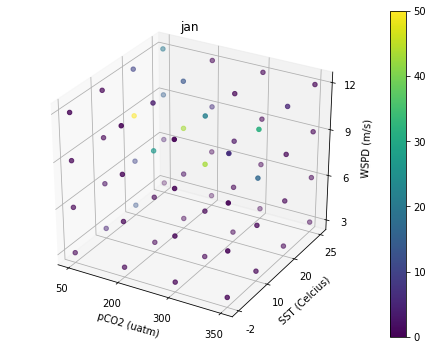

30.0


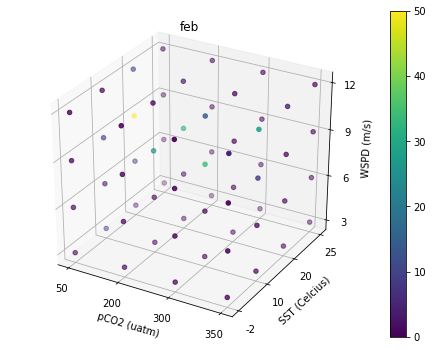

43.0


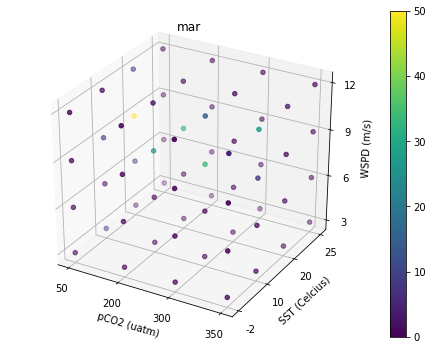

43.0


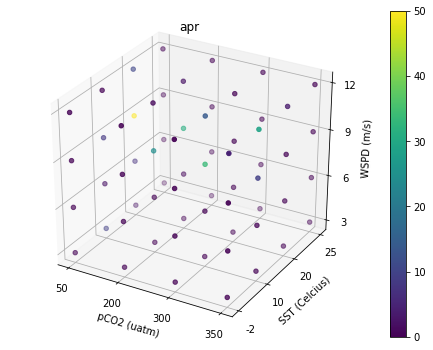

43.0


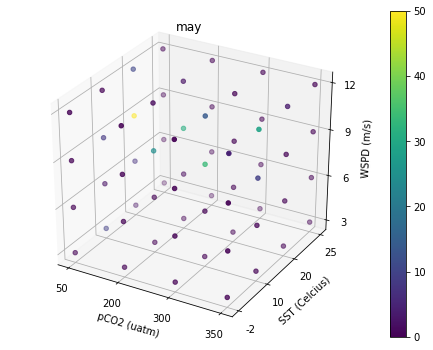

43.0


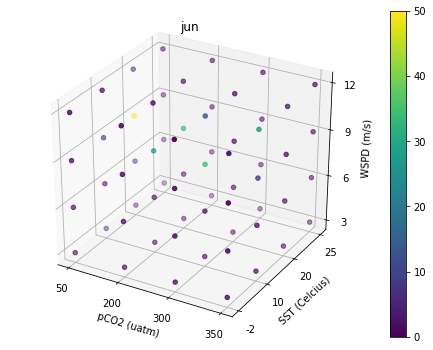

43.0


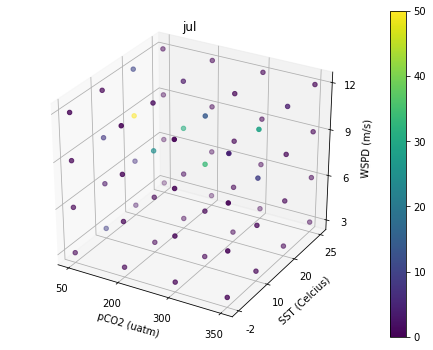

43.0


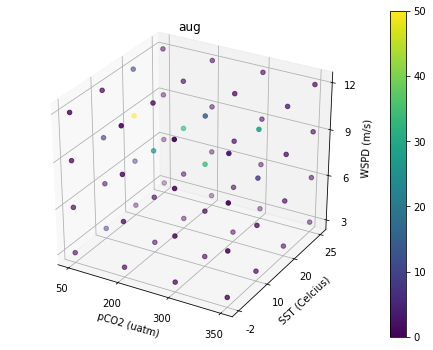

43.0


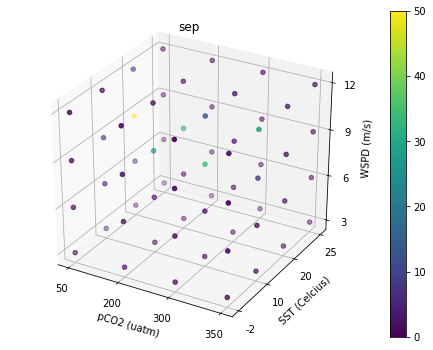

43.0


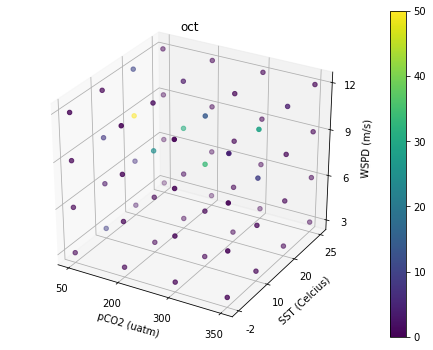

43.0


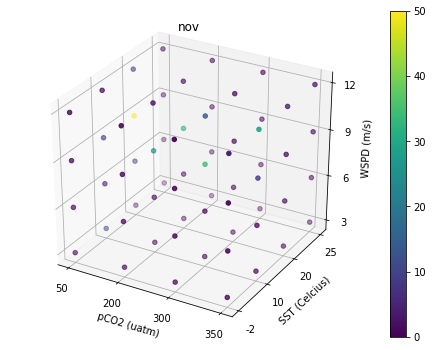

43.0


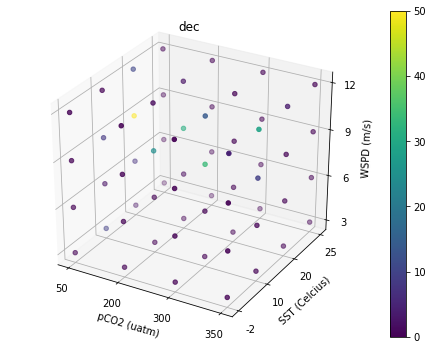

43.0


In [265]:
scatter3d = np.array([])
mos = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

for month in range(0,12):
    # getting important variables
    X = obs_pco2_reshaped[:,i]
    Y = obs_sst_reshaped[:,i]
    Z = obs_wspd_reshaped[:,i]
    xs = np.nan_to_num(X)
    ys = np.nan_to_num(Y)
    zs = np.nan_to_num(Z)

    # histogram input: binning datapoints according to 
    # North Atlantic region constraints
    r = np.column_stack((xs,ys,zs))
    x_axes = [50,200,300,350,400] # pCO2
    y_axes = [-2,10,20,25,30]     # SST
    z_axes = [3,6,9,12,15]        # WSPD
    
    H, edges = np.histogramdd(r, bins = (x_axes,y_axes,z_axes))
    
    xList = np.array([]) # pCO2
    yList = np.array([]) # SST
    zList = np.array([]) # WSPD

    for i in range(4):
        xList = np.append(xList, [0]*4 + [1]*4 + [2]*4 + [3]*4)
        yList = np.append(yList, [0,1,2,3]*4)
        zList = np.append(zList, [i]*16)

    HList = H.flatten() # color
    
    # classifying based on scatterplot (each datapoint)
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111,projection='3d')
    colmap = cm.ScalarMappable(cmap='viridis')
    colmap.set_clim(vmin=0, vmax=50)
    colmap.set_array(HList)
    yg = ax.scatter(xList, yList, zList, c=HList)
    cb = fig.colorbar(colmap)
    
    ax.set_title(mos[month])
    ax.set_xlabel('pCO2 (uatm)')
    ax.set_ylabel('SST (Celcius)')
    ax.set_zlabel('WSPD (m/s)')
#     ax.set_xlim(0,400)
#     ax.set_ylim(0,30)
#     ax.set_zlim(0,14)
    
    x = [-0.5,1.5,2.5,3.5,4.5]
    y = [3.5,2.5,1.5,0.5,-0.5]
    z = [-0.5,0.5,1.5,2.5,3.5]
    ax.set_xticks([0,1,2,3],)
    ax.set_yticks([0,1,2,3],)
    ax.set_zticks([0,1,2,3],)
    ax.set_xticklabels(x_axes, )
    ax.set_yticklabels(y_axes, )
    ax.set_zticklabels(z_axes, )
#     ax.xticks(x, x_axes, rotation='horizontal')
#     ax.yticks(y, y_axes, rotation='horizontal')
#     ax.zticks(z, z_axes, rotation='horizontal')

    plt.show()
    print(max(HList))